In [2]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

data = pd.read_excel('C:/Users/OBELAB_JH_DESKTOP/Downloads/WJ_project/WJ_meta/meta_data/total_meta.xlsx')
data.head()
data.tail()
data.describe


<bound method NDFrame.describe of        No.      검사일자     검사장소       아동연구번호  아동명  성별 성별_1   학년 학년_1       생년월일  \
0      1.0  20190131       본사  OBE_WJ_1001  박서윤   2  NaN  NaN  NaN 2010-09-28   
1      2.0  20190131       본사  OBE_WJ_1002  박시완   2  NaN  NaN  NaN 2012-12-24   
2      3.0  20190131       본사  OBE_WJ_1003  남아현   2  NaN  NaN  NaN 2008-01-21   
3      4.0  20190131       본사  OBE_WJ_1004  남서현   2  NaN  NaN  NaN 2010-07-05   
4      5.0  20190201       본사  OBE_WJ_1005  조은채   2  NaN  NaN  NaN 2011-01-05   
5      6.0  20190201       본사  OBE_WJ_1006  최은율   2  NaN  NaN  NaN 2010-09-20   
6      7.0  20190201       본사  OBE_WJ_1007  지인화   2  NaN  NaN  NaN 2010-11-30   
7      8.0  20190202       본사  OBE_WJ_1008  김민하   2  NaN  NaN  NaN 2011-08-30   
8      9.0  20190202       본사  OBE_WJ_1009  조예진   2  NaN  NaN  NaN 2007-06-16   
9     10.0  20190202       본사  OBE_WJ_1010  조예담   2  NaN  NaN  NaN 2010-10-02   
10    11.0  20190202       본사  OBE_WJ_1011  윤예림   2  NaN  NaN  NaN 2011-10-

In [3]:
styles = ['-', '--', ':']
colors = ['deepskyblue', 'mediumseagreen', 'hotpink']
widths = [10, 5, 2]


data1 = data.drop(['검사장소', '아동연구번호', '아동명', '성별_1', '학년_1',
       '생년월일', '연령(만:개월)', '연령 월', '검사자', 
       'CCTT-1_%ile', 
       'CCTT-2_%ile', '간섭지표A_Raw Socre', '간섭지표A_%ile', '간섭지표B_Raw Socre',
       '간섭지표B_T Score', '간섭지표B_%ile', 'cong acc', 'cong rt',
       'incong acc', 'incog_rt', 'Unnamed: 44', 'Unnamed: 45',
       ], axis=1)

data1.columns




Index(['No.', '검사일자', '성별', '학년', '월령', 'DSF', 'LDSF', 'DSB', 'LDSB',
       'DS_Raw Score', 'DS_환산점수', '유형', 'Coding_Raw Score', 'Coding_환산점수',
       'SymbolSearchRaw Score', 'SymbolSearch_환산점수', 'CCTT-1_Raw Socre',
       'CCTT-1_T Score', 'CCTT-2_Raw Socre', 'CCTT-2_T Score',
       'CBTTF Accuracy(%)', 'CBTTB Accuracy(%)', 'GNG Accuracy(%)',
       'GNG ReactionTime(s)', 'STROOP Accuracy(%)', 'STROOP ReactionTime(s)',
       '2BACK Accuracy(%)', '2BACK ReactionTime(s)'],
      dtype='object')

In [4]:
eng_index = ['no', 'date', 'gender', 'grade', 'age', 'DSF', 'LDSF', 'DSB', 'LDSB',
       'DS_Raw_score', 'DS_T_score', 'type', 'Coding_Raw_score', 'Coding_T_score',
       'SymbolSearchRaw_score', 'SymbolSearch_T_score', 'CCTT1_Raw_score',
       'CCTT1_T_score', 'CCTT2_Raw_socre', 'CCTT2_T_score',
       'CBTTF_acc', 'CBTTB_acc',
             
       'GNG_acc', 'GNG_rt',
       'STROOP_acc', 'STROOP_rt', 'BACK2_acc',
       'BACK2_rt']


data1.columns = eng_index


data1.describe()

no          date      gender       grade         age  \
count  168.000000  1.760000e+02  176.000000  151.000000  150.000000   
mean    84.500000  2.019021e+07    1.426136    3.158940  106.260000   
std     48.641546  1.341247e+01    0.697095    1.740087   21.183579   
min      1.000000  2.019013e+07   -1.000000    1.000000   74.000000   
25%     42.750000  2.019021e+07    1.000000    2.000000   89.250000   
50%     84.500000  2.019021e+07    2.000000    3.000000  102.500000   
75%    126.250000  2.019022e+07    2.000000    4.000000  117.750000   
max    168.000000  2.019022e+07    2.000000    7.000000  157.000000   

              DSF        LDSF         DSB        LDSB  DS_Raw_score  \
count  153.000000  153.000000  152.000000  152.000000    152.000000   
mean    10.581699    6.888889    6.815789    3.921053     17.401316   
std      2.990367    1.579288    2.217991    1.383566      4.522585   
min      3.000000    3.000000    2.000000    2.000000      7.000000   
25%      9.000000    6.000000    5.000000    3.000000     14.000000   
50%     10.000000    7.000000    6.000000    4.000000     17.000000   
75%     12.000000    8.000000    8.000000    5.000000     20.000000   
max     16.000000    9.000000   14.000000    7.000000     30.000000   

          ...      SymbolSearch_T_score  CCTT1_Raw_score  CCTT2_Raw_socre  \
count     ...                148.000000       152.000000       151.000000   
mean      ...                 11.148649        28.460526        54.774834   
std       ...                  2.884075        16.852646        29.157085   
min       ...                  4.000000         8.000000         9.000000   
25%       ...                  9.000000        18.000000        38.000000   
50%       ...                 11.000000        25.500000        49.000000   
75%       ...                 13.000000        32.000000        62.000000   
max       ...                 24.000000       118.000000       266.000000   

        CBTTF_acc   CBTTB_acc     GNG_acc      GNG_rt  STROOP_acc   STROOP_rt  \
count  135.000000  135.000000  136.000000  136.000000  136.000000  136.000000   
mean     0.820345    0.759936    0.965622    0.560187    0.967677    1.605030   
std      0.151332    0.182764    0.022989    0.101965    0.052612    0.431050   
min      0.261905    0.000000    0.902439    0.366238    0.529412    0.904054   
25%      0.755102    0.699678    0.948718    0.480409    0.956522    1.300342   
50%      0.847826    0.796296    0.972973    0.545788    0.970143    1.534963   
75%      0.932351    0.884358    0.975610    0.631855    1.000000    1.819677   
max      1.000000    1.000000    1.000000    0.870417    1.000000    3.089375   

        BACK2_acc  
count  128.000000  
mean     0.808469  
std      0.105630  
min      0.480000  
25%      0.750000  
50%      0.833333  
75%      0.884615  
max      1.000000  

[8 rows x 24 columns]

In [5]:
data1.shape

(176, 28)

In [6]:
data1[data1.dtypes[(data1.dtypes=="float64")|(data1.dtypes=="int64")]
                        .index.values].hist(figsize=[15,15])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244F7464B38>,
      dtype=object)

In [7]:
data2 = data1.dropna(subset=['no'])

In [7]:
data2.tail()

no      date  gender  grade    age   DSF  LDSF  DSB  LDSB  \
163  164.0  20190221       1    2.0   94.0  11.0   7.0  5.0   3.0   
164  165.0  20190221       1    1.0   84.0   9.0   6.0  5.0   3.0   
165  166.0  20190221       2    3.0   97.0  13.0   8.0  8.0   4.0   
166  167.0  20190221       1    2.0   94.0  12.0   8.0  4.0   4.0   
167  168.0  20190221       1    4.0  115.0   6.0   5.0  7.0   4.0   

     DS_Raw_score   ...     CCTT2_Raw_socre CCTT2_T_score  CBTTF_acc  \
163          16.0   ...                48.0            61   0.891304   
164          14.0   ...                60.0            53   0.622642   
165          21.0   ...                60.0            45   0.938776   
166          16.0   ...                59.0            53   0.860000   
167          13.0   ...                72.0            33   0.754717   

     CBTTB_acc   GNG_acc    GNG_rt  STROOP_acc STROOP_rt  BACK2_acc BACK2_rt  
163   0.846154  0.973684  0.472125    0.916667  1.778833   0.846154  0.99525  
164   0.500000  0.944444  0.672118    1.000000  2.324400   0.769231    0.885  
165   0.590909  0.909091  0.664125    1.000000  1.540963   0.791667  1.39214  
166   0.862745  0.972973  0.642062    1.000000  1.657120        NaN      NaN  
167   0.660000  1.000000  0.501773    0.933333  1.301933   0.760000  1.13688  

[5 rows x 28 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244F95B90F0>,
      dtype=object)

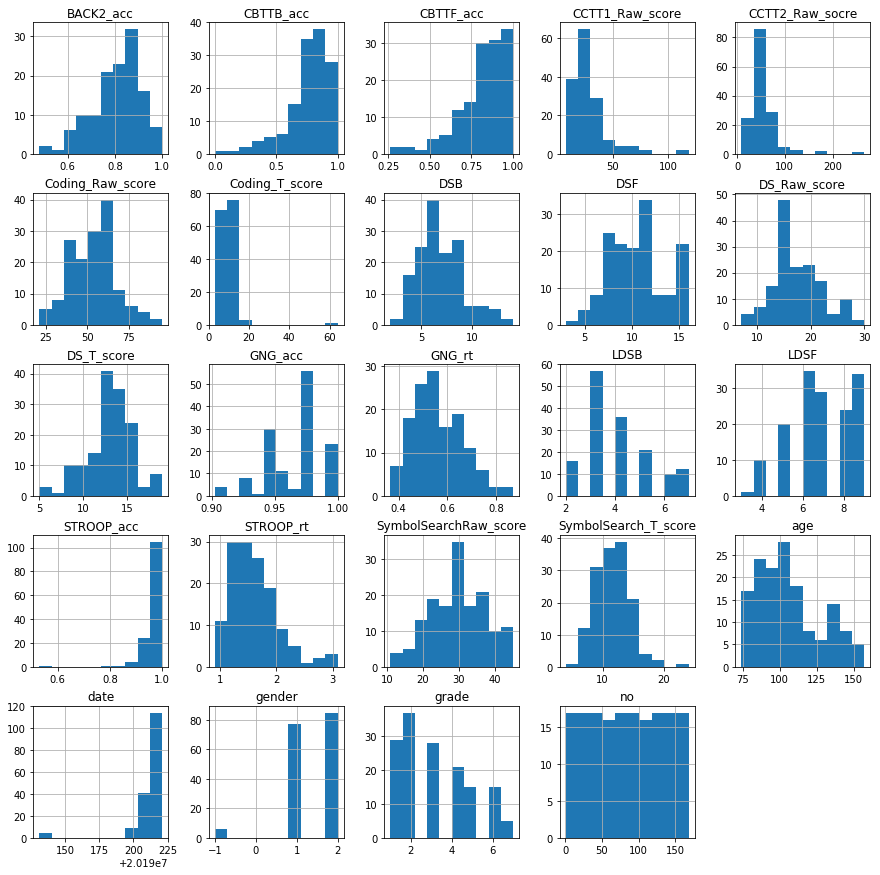

In [8]:
data2[data2.dtypes[(data2.dtypes=="float64")|(data2.dtypes=="int64")]
                        .index.values].hist(figsize=[15,15])

In [9]:
data2 = data2[data2.gender != -1]
data2 = data2[data2.Coding_T_score != 64]
data2.describe()

no          date      gender       grade         age  \
count  161.000000  1.610000e+02  161.000000  148.000000  149.000000   
mean    84.869565  2.019021e+07    1.521739    3.135135  106.422819   
std     49.653566  1.396240e+01    0.501086    1.732635   21.160641   
min      1.000000  2.019013e+07    1.000000    1.000000   74.000000   
25%     41.000000  2.019021e+07    1.000000    2.000000   90.000000   
50%     88.000000  2.019021e+07    2.000000    3.000000  103.000000   
75%    128.000000  2.019022e+07    2.000000    4.000000  118.000000   
max    168.000000  2.019022e+07    2.000000    7.000000  157.000000   

              DSF        LDSF         DSB        LDSB  DS_Raw_score  \
count  152.000000  152.000000  151.000000  151.000000    151.000000   
mean    10.546053    6.875000    6.814570    3.920530     17.364238   
std      2.967459    1.575106    2.225321    1.388156      4.514397   
min      3.000000    3.000000    2.000000    2.000000      7.000000   
25%      8.750000    6.000000    5.000000    3.000000     14.000000   
50%     10.000000    7.000000    6.000000    4.000000     17.000000   
75%     12.000000    8.000000    8.000000    5.000000     20.000000   
max     16.000000    9.000000   14.000000    7.000000     30.000000   

          ...      SymbolSearch_T_score  CCTT1_Raw_score  CCTT2_Raw_socre  \
count     ...                147.000000       151.000000       150.000000   
mean      ...                 11.170068        28.211921        54.406667   
std       ...                  2.882099        16.626729        28.900453   
min       ...                  4.000000         8.000000         9.000000   
25%       ...                  9.000000        18.000000        38.000000   
50%       ...                 11.000000        25.000000        48.500000   
75%       ...                 13.000000        32.000000        62.000000   
max       ...                 24.000000       118.000000       266.000000   

        CBTTF_acc   CBTTB_acc     GNG_acc      GNG_rt  STROOP_acc   STROOP_rt  \
count  134.000000  134.000000  135.000000  135.000000  135.000000  135.000000   
mean     0.821907    0.760997    0.965779    0.560457    0.967760    1.603108   
std      0.150804    0.183031    0.023001    0.102296    0.052800    0.432070   
min      0.261905    0.000000    0.902439    0.366238    0.529412    0.904054   
25%      0.755102    0.703704    0.948718    0.479901    0.956522    1.298750   
50%      0.849445    0.796296    0.972973    0.546957    0.970588    1.533000   
75%      0.935563    0.885361    0.975610    0.632335    1.000000    1.816146   
max      1.000000    1.000000    1.000000    0.870417    1.000000    3.089375   

        BACK2_acc  
count  127.000000  
mean     0.808851  
std      0.105960  
min      0.480000  
25%      0.750000  
50%      0.833333  
75%      0.884615  
max      1.000000  

[8 rows x 24 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244F95B0E80>,
      dtype=object)

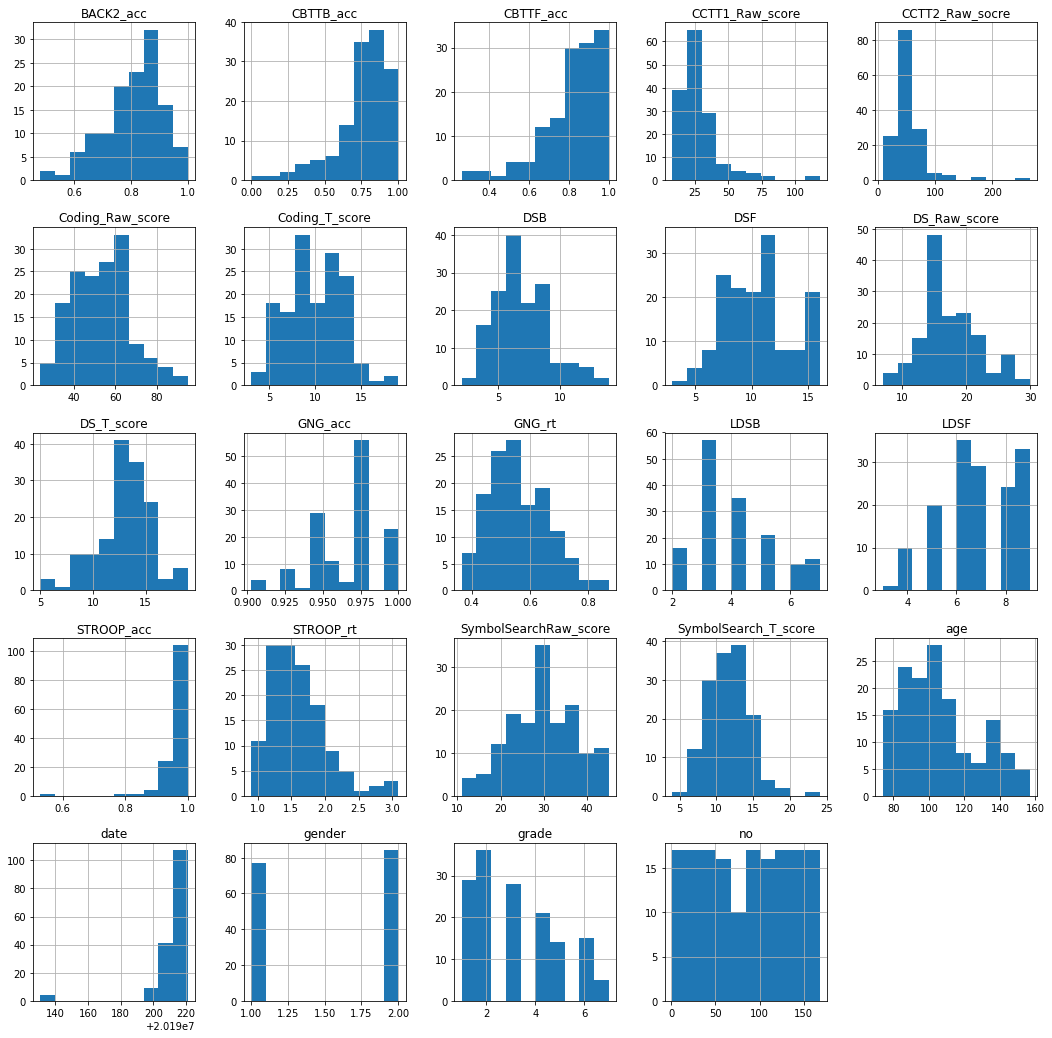

In [10]:
data2.hist(figsize=[18, 18])

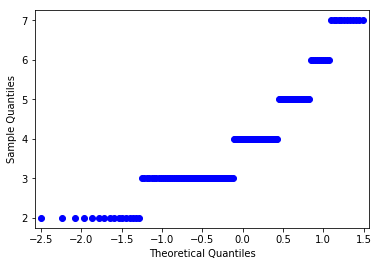

In [11]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(data2.LDSB, line='s')
pyplot.show()

In [12]:
shapiro = sp.stats.shapiro
shapiro(data2.GNG_rt.dropna())
sp.stats.ttest_ind(data['DSB'], data['LDSB'], nan_policy='omit')   
shapiro(data2['DSB'])

(nan, 1.0)

In [13]:
for col in data2.columns:
    shapiro(data2['%s' % (col)])

TypeError: '<' not supported between instances of 'str' and 'float'

In [13]:
data2_isnan = data2.fillna('')
#shapiro(data2_isnan.DSB)
data2.DSB.dropna()

0       5.0
1       5.0
2       8.0
3       7.0
4       6.0
5       7.0
6       7.0
7       6.0
8       9.0
9       6.0
10      5.0
11      6.0
13     11.0
14      7.0
15      4.0
17      5.0
18     10.0
19      9.0
20      6.0
21      7.0
22      4.0
23      4.0
24      8.0
25      6.0
26      6.0
29      9.0
30      4.0
31      5.0
32      4.0
33     10.0
       ... 
136     6.0
137     6.0
138     7.0
139     8.0
140     4.0
141    11.0
142    12.0
143     5.0
144     6.0
145     5.0
146     9.0
147     7.0
148     7.0
149     6.0
150    11.0
151     6.0
152     6.0
153     7.0
154     6.0
156     5.0
157     7.0
159     4.0
160    10.0
161     6.0
162     8.0
163     5.0
164     5.0
165     8.0
166     4.0
167     7.0
Name: DSB, Length: 151, dtype: float64

In [14]:
data2.DSB.describe()

count    151.000000
mean       6.814570
std        2.225321
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       14.000000
Name: DSB, dtype: float64

In [15]:
shapiro(data2.BACK2_acc.dropna())

(0.9546554684638977, 0.00031474261777475476)

In [16]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1., vmax=1.)
norm(0.)


0.5

In [17]:
data2.shape
x, y = data2.shape
print(y)
data2.corr()

28


no      date    gender     grade       age  \
no                     1.000000  0.591815  0.026616 -0.007215  0.019286   
date                   0.591815  1.000000 -0.134775  0.000410  0.034575   
gender                 0.026616 -0.134775  1.000000  0.064746  0.028358   
grade                 -0.007215  0.000410  0.064746  1.000000  0.932741   
age                    0.019286  0.034575  0.028358  0.932741  1.000000   
DSF                    0.165189  0.123112  0.039099  0.490711  0.480187   
LDSF                   0.164080  0.127544  0.076645  0.504853  0.491979   
DSB                    0.030412  0.047951  0.124640  0.583021  0.575138   
LDSB                   0.017260  0.024906  0.080152  0.578086  0.570448   
DS_Raw_score           0.132712  0.107713  0.088059  0.608500  0.600064   
DS_T_score             0.149278  0.084850  0.030276  0.006728 -0.041124   
Coding_Raw_score      -0.002182 -0.011533  0.155348  0.480973  0.524527   
Coding_T_score        -0.074154 -0.100238  0.186353 -0.114549 -0.130656   
SymbolSearchRaw_score  0.100999  0.015140  0.061681  0.217236  0.236111   
SymbolSearch_T_score  -0.011991 -0.120927  0.167727  0.028383 -0.007015   
CCTT1_Raw_score       -0.024139  0.038898 -0.008770 -0.516561 -0.529690   
CCTT2_Raw_socre       -0.126588 -0.086857  0.088363 -0.481888 -0.527572   
CBTTF_acc              0.030146  0.032626  0.111673  0.493356  0.504992   
CBTTB_acc              0.054210  0.055524  0.104276  0.524620  0.539017   
GNG_acc               -0.044104 -0.074501 -0.034935  0.101242  0.131333   
GNG_rt                -0.027910 -0.043767 -0.032650 -0.356846 -0.387926   
STROOP_acc             0.087285  0.094704  0.063871  0.202427  0.178856   
STROOP_rt              0.024104  0.001815 -0.070034 -0.647571 -0.658917   
BACK2_acc             -0.182246 -0.207111 -0.017584  0.478819  0.516654   

                            DSF      LDSF       DSB      LDSB  DS_Raw_score  \
no                     0.165189  0.164080  0.030412  0.017260      0.132712   
date                   0.123112  0.127544  0.047951  0.024906      0.107713   
gender                 0.039099  0.076645  0.124640  0.080152      0.088059   
grade                  0.490711  0.504853  0.583021  0.578086      0.608500   
age                    0.480187  0.491979  0.575138  0.570448      0.600064   
DSF                    1.000000  0.942746  0.491479  0.510737      0.900722   
LDSF                   0.942746  1.000000  0.487049  0.512795      0.860165   
DSB                    0.491479  0.487049  1.000000  0.938301      0.818369   
LDSB                   0.510737  0.512795  0.938301  1.000000      0.799328   
DS_Raw_score           0.900722  0.860165  0.818369  0.799328      1.000000   
DS_T_score             0.732260  0.697773  0.505917  0.492183      0.737998   
Coding_Raw_score       0.243750  0.232094  0.360641  0.347038      0.342638   
Coding_T_score        -0.070339 -0.089638 -0.012922 -0.018552     -0.051120   
SymbolSearchRaw_score  0.153118  0.153192  0.160932  0.154866      0.181308   
SymbolSearch_T_score  -0.007773 -0.035126  0.025025  0.028083      0.002352   
CCTT1_Raw_score       -0.314166 -0.335982 -0.330914 -0.353908     -0.373859   
CCTT2_Raw_socre       -0.323881 -0.339353 -0.374909 -0.376348     -0.401935   
CBTTF_acc              0.266847  0.307129  0.376543  0.377878      0.359368   
CBTTB_acc              0.371402  0.364662  0.396609  0.415820      0.450456   
GNG_acc                0.023396  0.083548  0.023944  0.063670      0.026883   
GNG_rt                -0.164802 -0.171204 -0.296317 -0.283678     -0.250158   
STROOP_acc             0.265107  0.248474  0.144446  0.154668      0.247003   
STROOP_rt             -0.398017 -0.367960 -0.479400 -0.490358     -0.497053   
BACK2_acc              0.286582  0.270722  0.369766  0.379613      0.377414   

                         ...      SymbolSearch_T_score  CCTT1_Raw_score  \
no                       ...                 -0.011991        -0.024139   
date                     ..

C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1

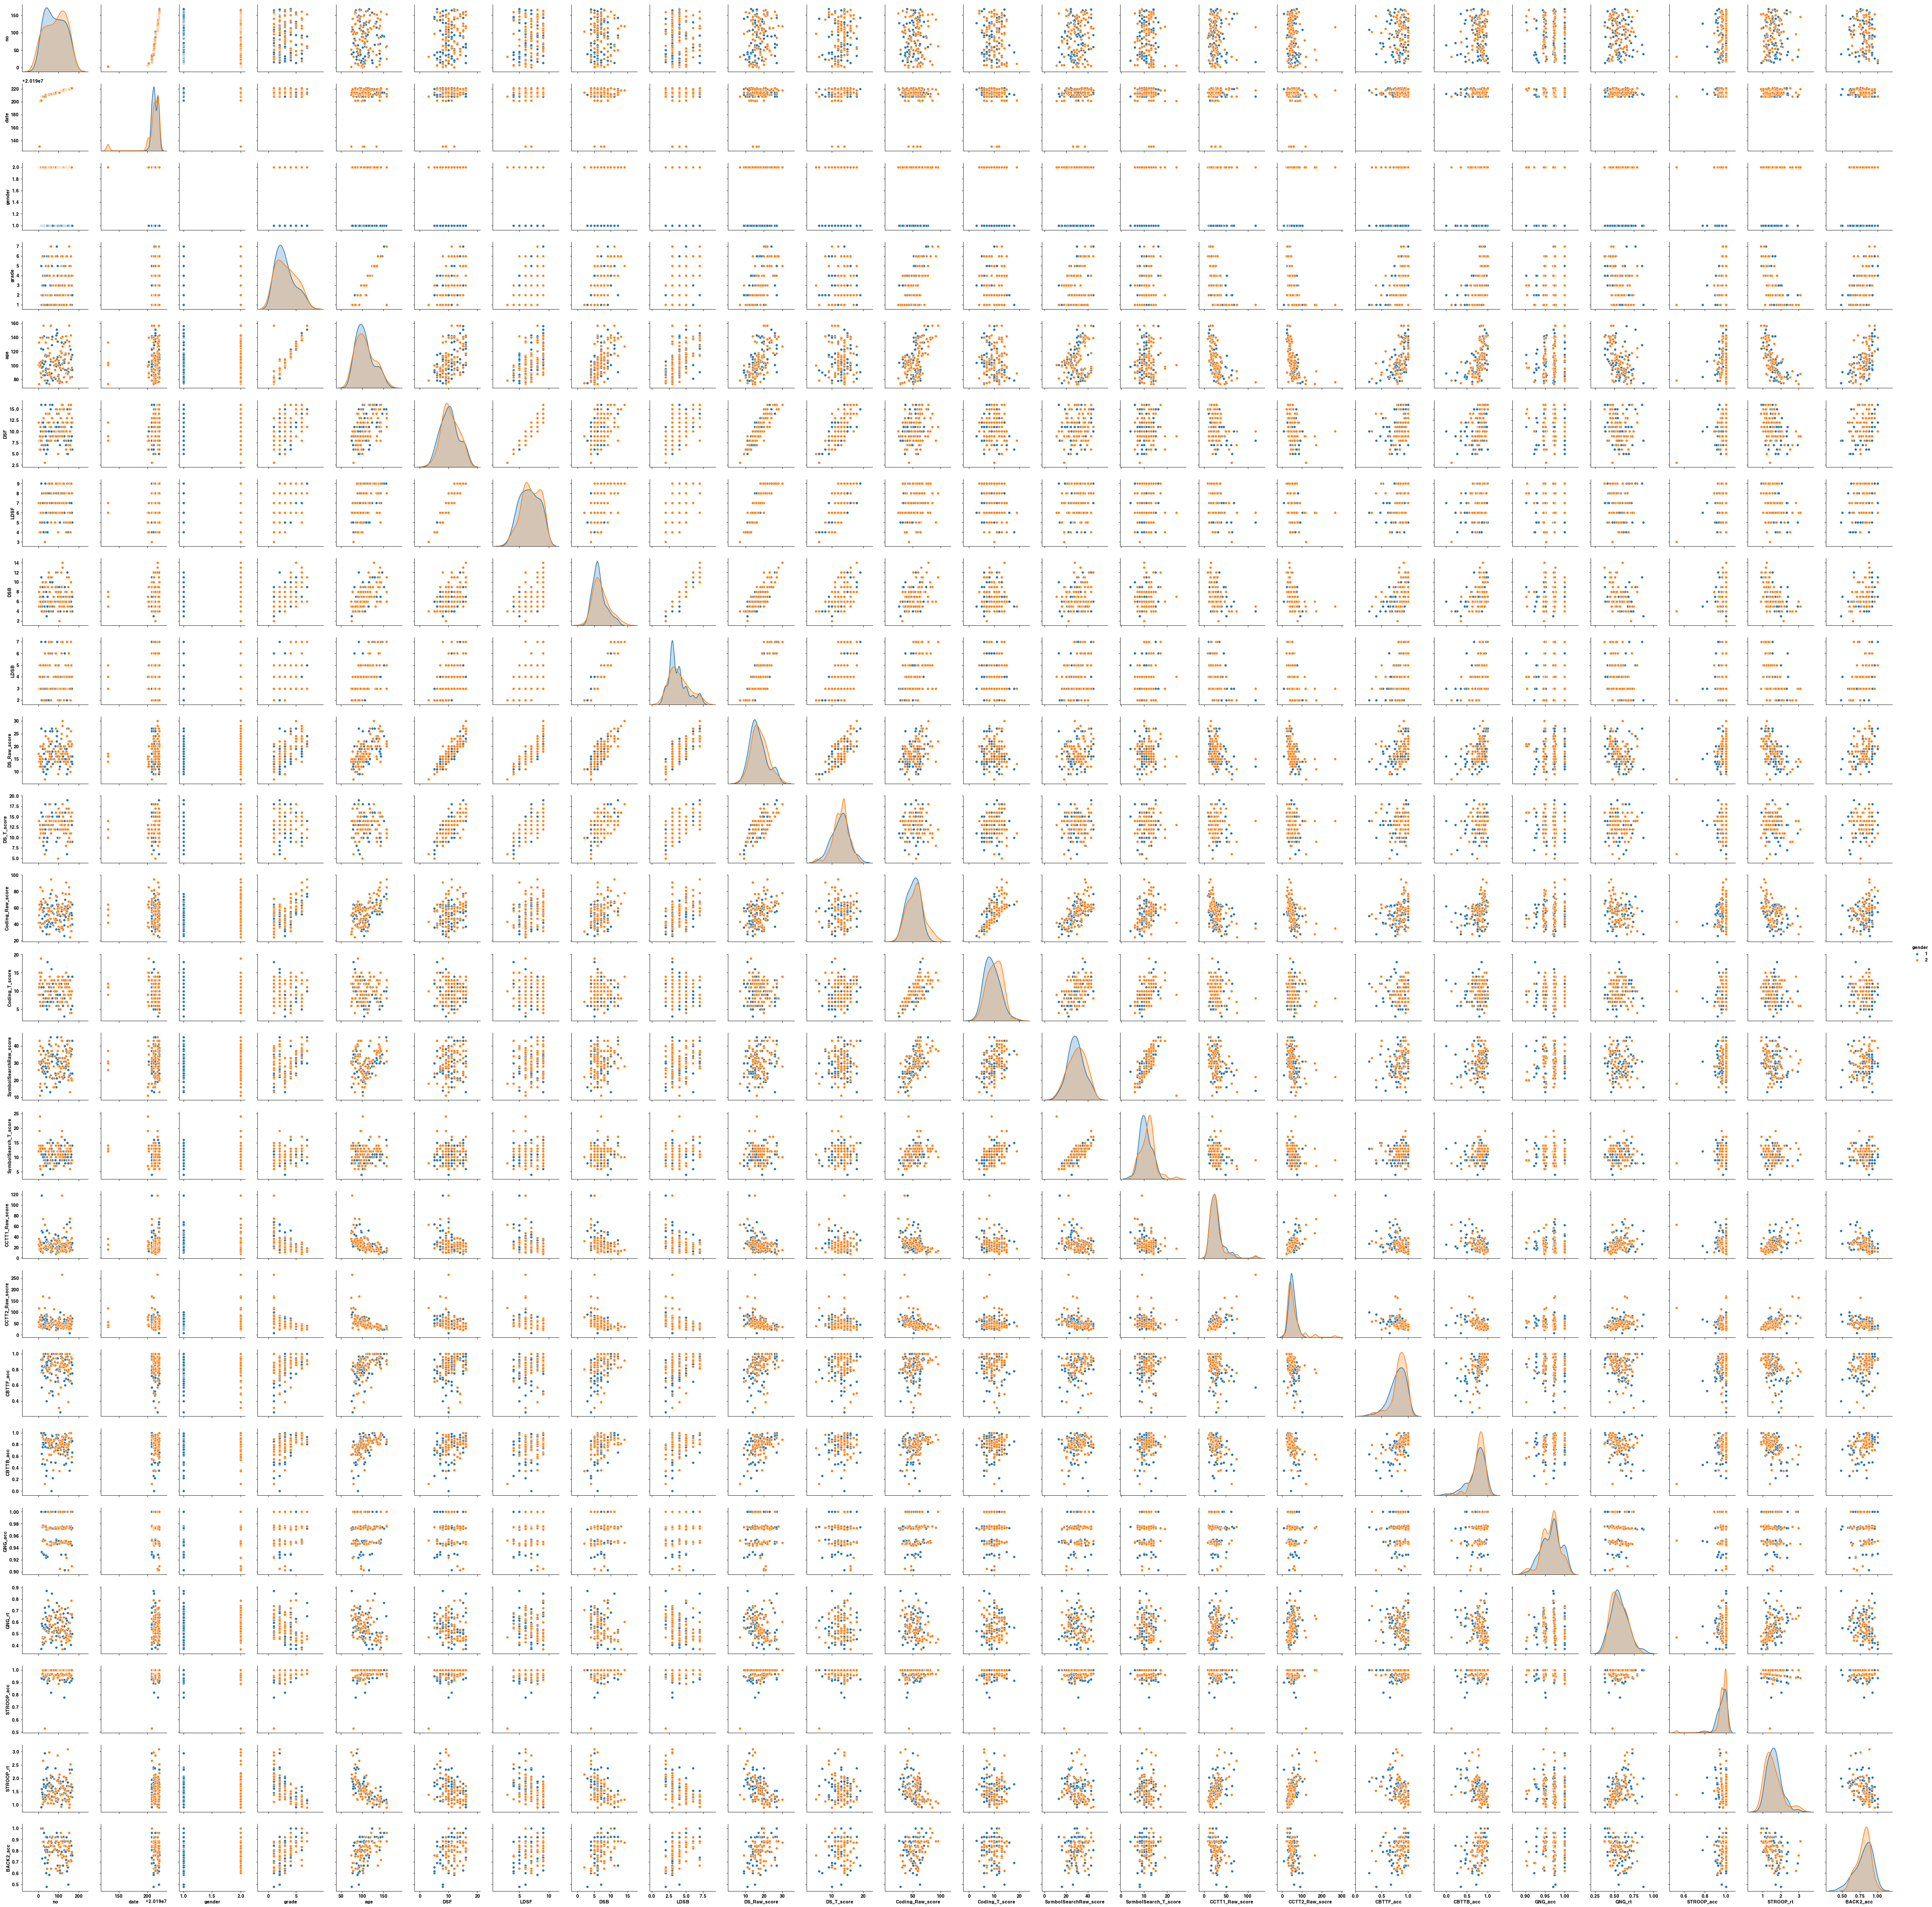

In [22]:
import matplotlib as mpl
import seaborn as sns

sns.pairplot(data2, hue='gender', size=2.5)

C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


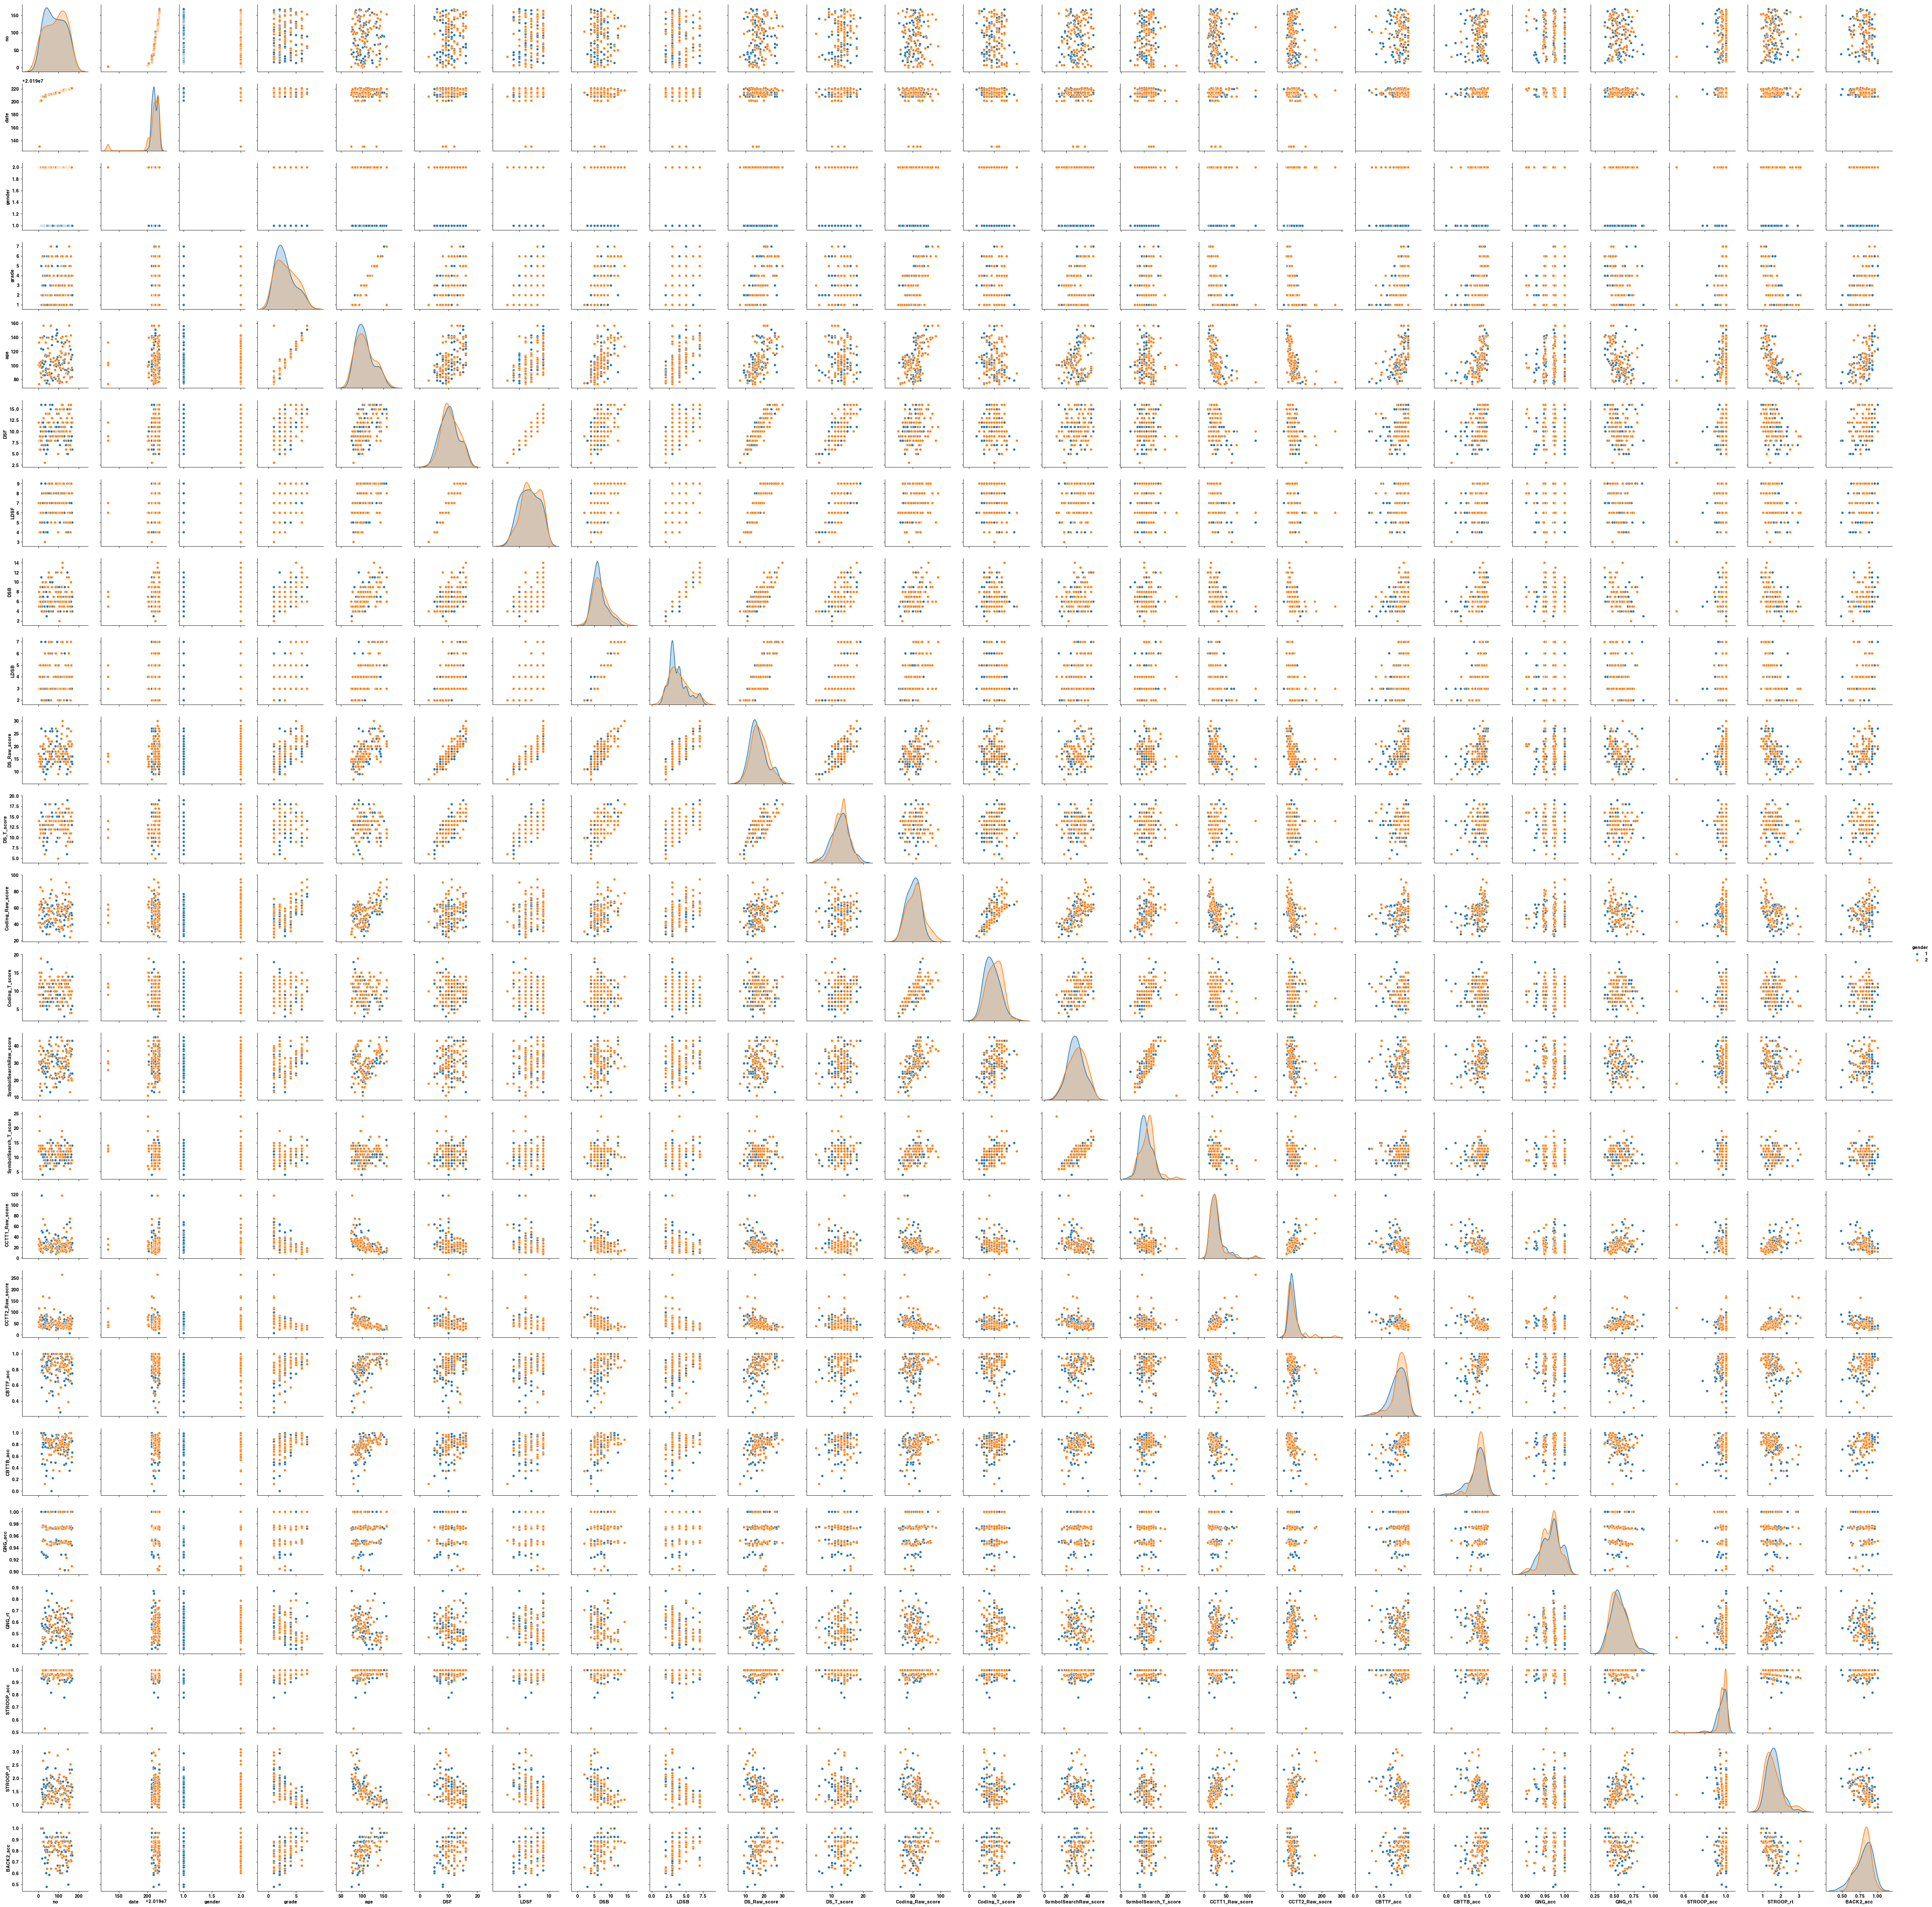

In [23]:
datafi = sns.pairplot(data2, hue='gender', size=2.5)
datafi.savefig('i2.png')


C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1

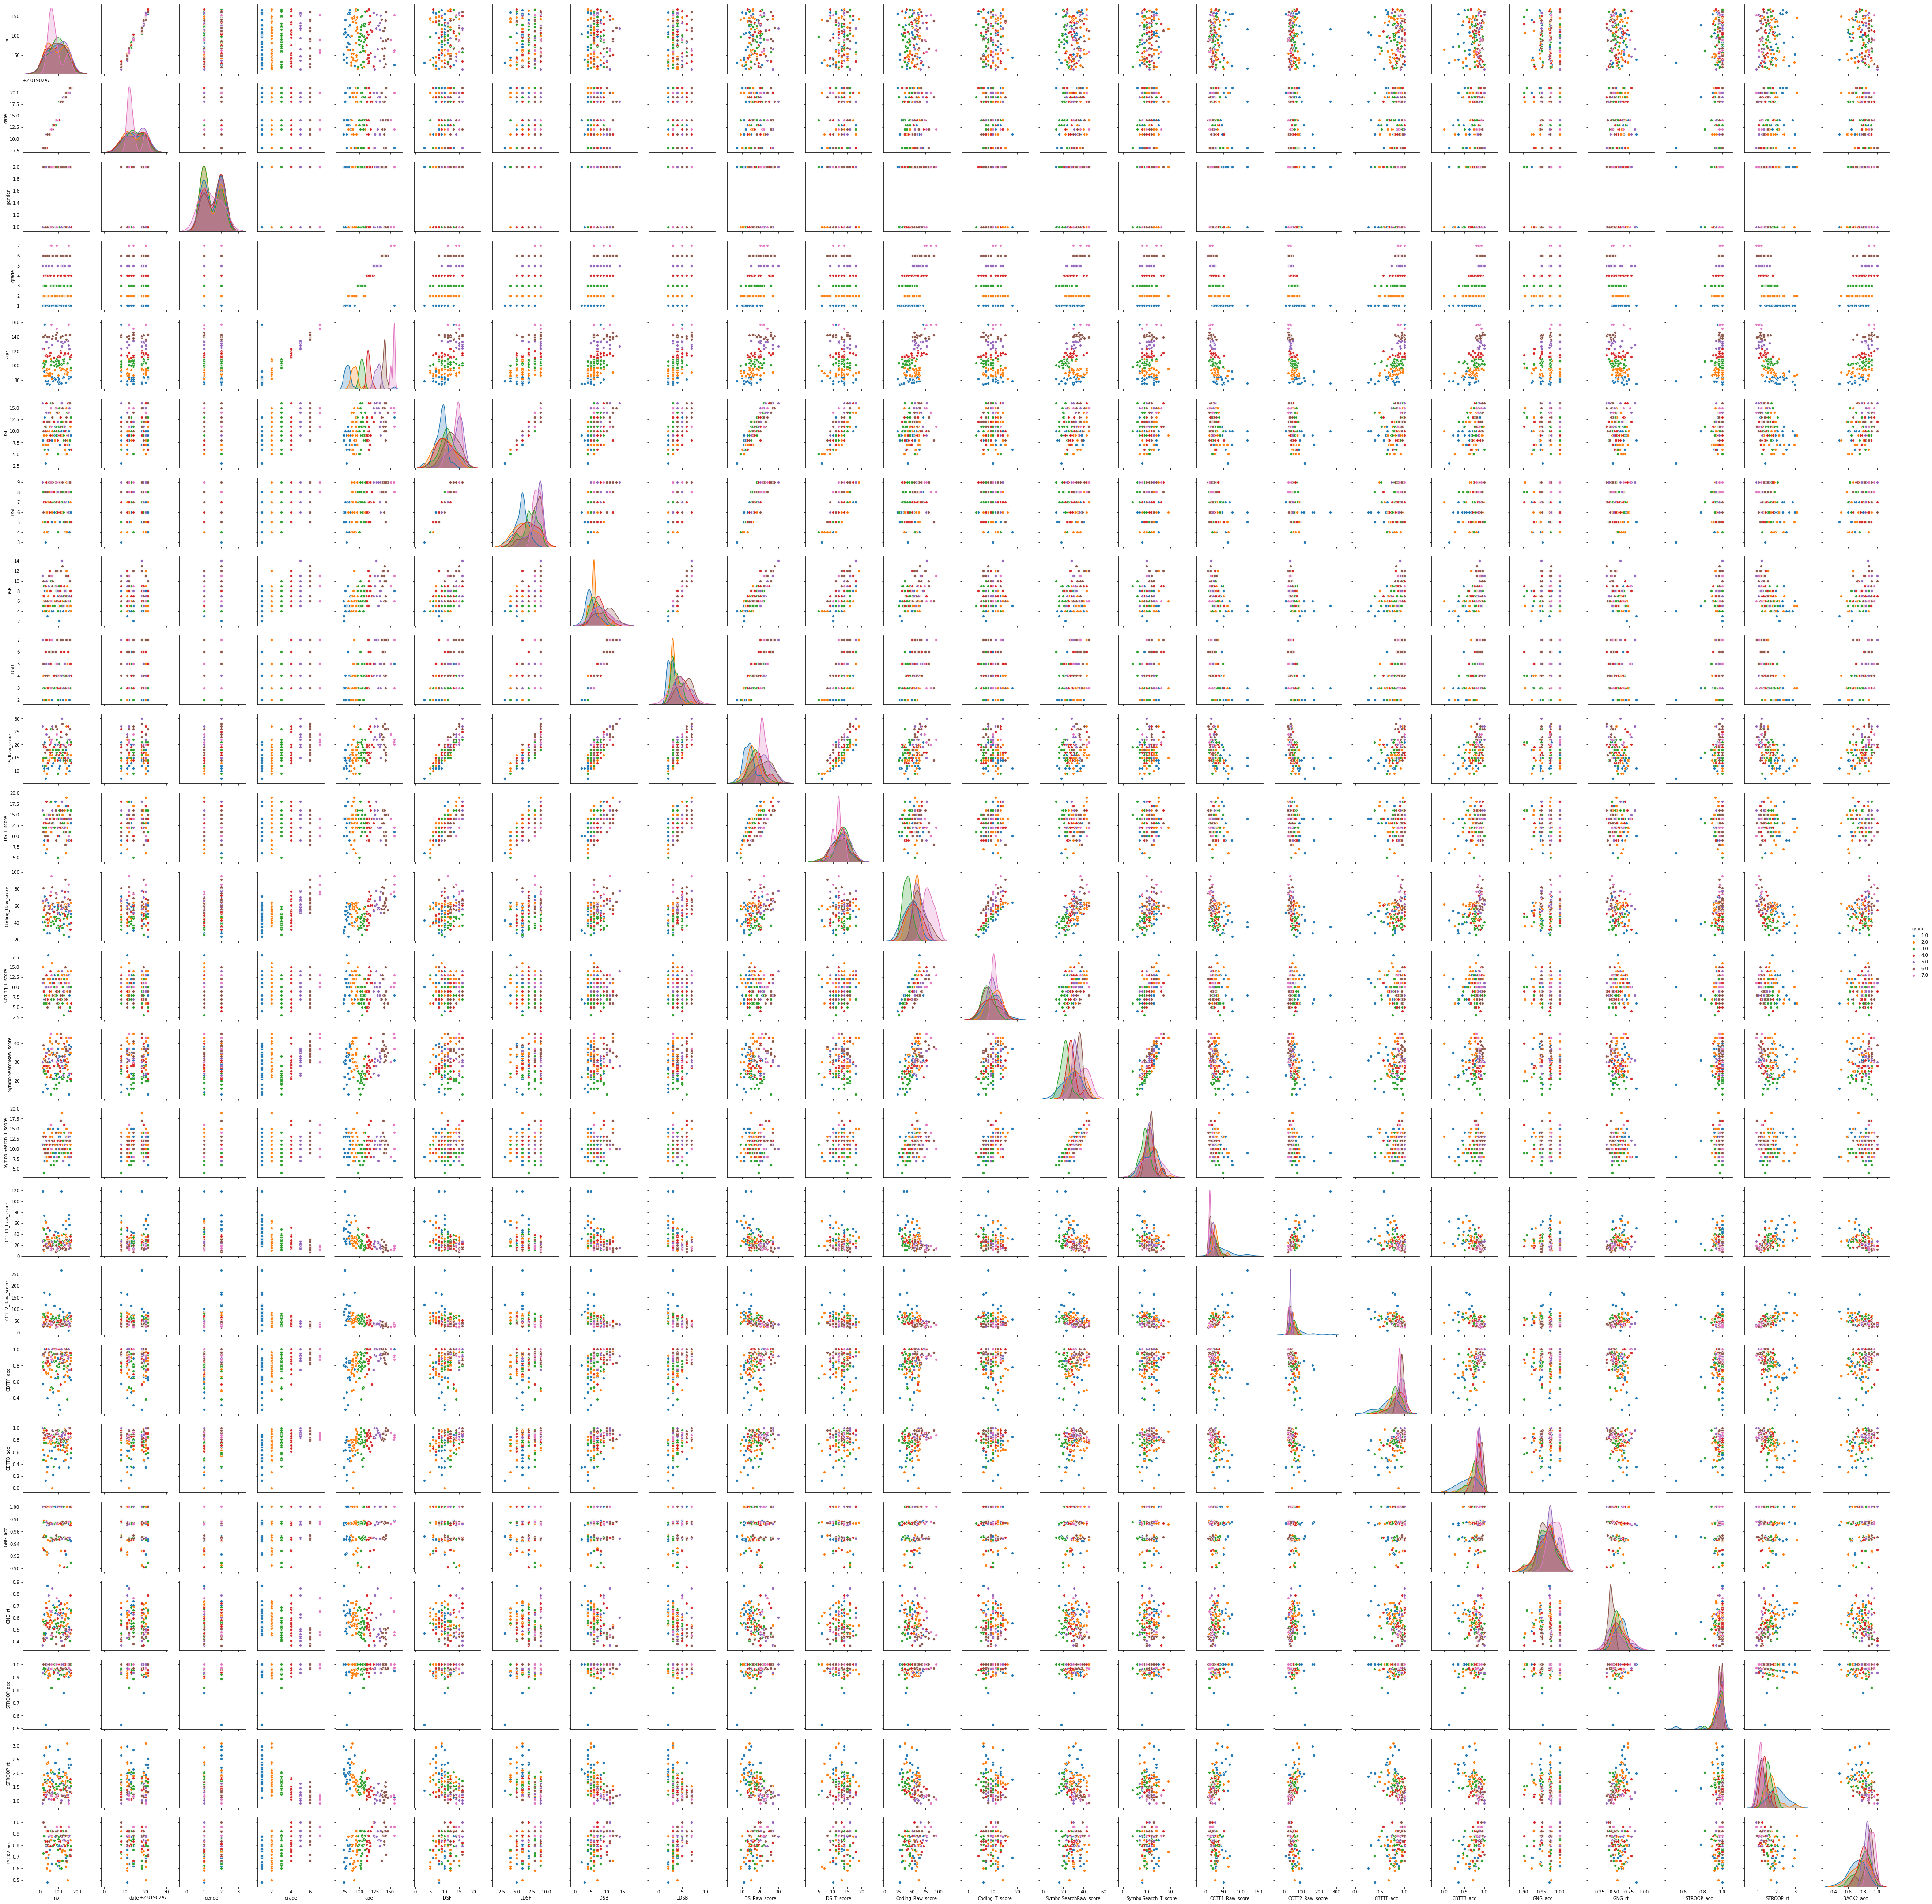

In [18]:
import matplotlib as mpl
import seaborn as sns

datafi = sns.pairplot(data2, hue='grade', size=2.5)
datafi.savefig('i.png')